![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/multi_class_text_classification/NLU_training_multi_class_text_classifier_demo_hotel_reviews.ipynb)



# Training a Deep Learning Classifier with NLU 
## ClassifierDL (Multi-class Text Classification)
## 3 class Tripadvisor Hotel review classifier training
With the [ClassifierDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl-multi-class-text-classification) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:

<br>

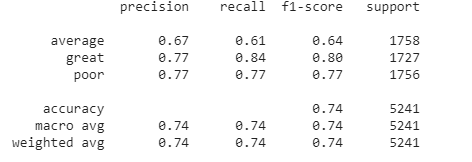

You can achieve these results or even better on this dataset with test data:

<br>


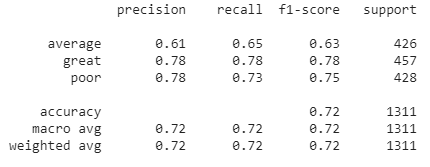


# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-05 05:05:11--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0.001s  

2021-05-05 05:05:11 (1.65 MB/s) - written to stdout [1671/1671]

     |████████████████████████████████| 204.8MB 72kB/s 
     |████████████████████████████████| 153kB 54.3MB/s 
     |████████████████████████████████| 204kB 22.3MB/s 
     |████████████████████████████████| 204kB 53.7MB/s 


# 2. Download hotel reviews  dataset 
https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews

Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/01/tripadvisor_hotel_reviews.csv


--2021-05-05 05:07:06--  http://ckl-it.de/wp-content/uploads/2021/01/tripadvisor_hotel_reviews.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5160790 (4.9M) [text/csv]
Saving to: ‘tripadvisor_hotel_reviews.csv’

tripadvisor_hotel_r 100%[===================>]   4.92M  4.01MB/s    in 1.2s    

2021-05-05 05:07:08 (4.01 MB/s) - ‘tripadvisor_hotel_reviews.csv’ saved [5160790/5160790]



In [ ]:
import pandas as pd
test_path = '/content/tripadvisor_hotel_reviews.csv'
train_df = pd.read_csv(test_path,sep=",")
cols = ["y","text"]
train_df = train_df[cols]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df



,y,text
577,average,decent hotel decent price stayed 5 nights delu...
5746,great,good said previous posts small tasteful renova...
675,great,gold floor best stayed gold floor club floor f...
4415,poor,"truly awful, admit slightly sceptical arriving..."
4099,great,union square jewel loved hotel ammenities loca...
...,...,...
6318,average,average read travellers wrote hotel prior leav...
3855,great,plush comfortable stayed nights mark hopkins f...
1061,average,great potential just want special thanks anima...
3060,average,centrally located hotel enjoyable stay stayed ...


# 3. Train Deep Learning Classifier using nlu.load('train.classifier')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# Since there are no

trainable_pipe = nlu.load('train.classifier')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50] )


# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50] ,output_level='document')
preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,trained_classifier_confidence_confidence,text,y,sentence,sentence_embedding_use,document,trained_classifier,origin_index
0,0.545426,decent hotel decent price stayed 5 nights delu...,average,[decent hotel decent price stayed 5 nights del...,"[0.053218383342027664, 0.04507320374250412, 0....",decent hotel decent price stayed 5 nights delu...,poor,577
1,0.697417,good said previous posts small tasteful renova...,great,[good said previous posts small tasteful renov...,"[0.039876967668533325, 0.06624795496463776, -0...",good said previous posts small tasteful renova...,great,5746
2,0.671591,gold floor best stayed gold floor club floor f...,great,[gold floor best stayed gold floor club floor ...,"[0.0038577697705477476, 0.05996308475732803, -...",gold floor best stayed gold floor club floor f...,great,675
3,0.969960,"truly awful, admit slightly sceptical arriving...",poor,"[truly awful, admit slightly sceptical arrivin...","[0.06336931884288788, 0.0006446511833928525, -...","truly awful, admit slightly sceptical arriving...",poor,4415
4,0.668067,union square jewel loved hotel ammenities loca...,great,[union square jewel loved hotel ammenities loc...,"[0.025744924321770668, 0.06057509407401085, 0....",union square jewel loved hotel ammenities loca...,great,4099
5,0.516283,affinia 50 great location room so-so affinia 5...,average,[affinia 50 great location room so-so affinia ...,"[0.06250237673521042, 0.009299570694565773, 0....",affinia 50 great location room so-so affinia 5...,poor,2621
6,0.484881,"impressed stay travel area 3 x year business, ...",poor,"[impressed stay travel area 3 x year business,...","[0.05403365194797516, 0.05502327159047127, 0.0...","impressed stay travel area 3 x year business, ...",great,2165
7,0.648219,nothing memorable no complaints close train st...,average,[nothing memorable no complaints close train s...,"[0.03432552516460419, 0.05315956100821495, -0....",nothing memorable no complaints close train st...,great,2522
8,0.561468,not recomended chose hotel based recomendation...,poor,[not recomended chose hotel based recomendatio...,"[0.06976918131113052, 0.021174855530261993, -0...",not recomended chose hotel based recomendation...,poor,5187
9,0.822802,promising 2-day stay location couple weeks ear...,average,[promising 2-day stay location couple weeks ea...,"[0.05621741712093353, 0.025512538850307465, -0...",promising 2-day stay location couple weeks ear...,poor,488


#4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict("It was a good experince!")

,trained_classifier_confidence_confidence,sentence,sentence_embedding_use,document,trained_classifier,origin_index
0,0.549657,[It was a good experince!],"[0.034853726625442505, 0.018303068354725838, -...",It was a good experince!,great,0


## Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['classifier_dl'] has settable params:
pipe['classifier_dl'].setMaxEpochs(3)                | Info: Maximum number of epochs to train | Currently set to : 3
pipe['classifier_dl'].setLr(0.005)                   | Info: Learning Rate | Currently set to : 0.005
pipe['classifier_dl'].setBatchSize(64)               | Info: Batch size | Currently set to : 64
pipe['classifier_dl'].setDropout(0.5)                | Info: Dropout coefficient | Currently set to : 0.5
pipe['classifier_dl'].setEnableOutputLogs(True)      | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
>>> pipe['use@tfhub_use'] has settable params:
pipe['use@tfhub_use'].setDimension(512)              | Info: Number of embedding dimensions | Currently set to : 512
pipe['use@tfhub_use'].setLoadSP(False)               | Info: Whether to load SentencePiece ops file which is required only by multi

##5.  Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe = nlu.load('train.classifier')
trainable_pipe['trainable_classifier_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:100])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['classifier_dl']))
preds

              precision    recall  f1-score   support

     average       0.67      0.35      0.46        34
       great       0.73      0.94      0.82        34
        poor       0.66      0.78      0.71        32

    accuracy                           0.69       100
   macro avg       0.68      0.69      0.67       100
weighted avg       0.68      0.69      0.66       100



,trained_classifier_confidence_confidence,text,y,sentence,sentence_embedding_use,document,trained_classifier,origin_index
0,0.590834,decent hotel decent price stayed 5 nights delu...,average,[decent hotel decent price stayed 5 nights del...,"[0.053218383342027664, 0.04507320374250412, 0....",decent hotel decent price stayed 5 nights delu...,poor,577
1,0.993803,good said previous posts small tasteful renova...,great,[good said previous posts small tasteful renov...,"[0.039876967668533325, 0.06624795496463776, -0...",good said previous posts small tasteful renova...,great,5746
2,0.981204,gold floor best stayed gold floor club floor f...,great,[gold floor best stayed gold floor club floor ...,"[0.0038577697705477476, 0.05996308475732803, -...",gold floor best stayed gold floor club floor f...,great,675
3,0.880106,"truly awful, admit slightly sceptical arriving...",poor,"[truly awful, admit slightly sceptical arrivin...","[0.06336931884288788, 0.0006446511833928525, -...","truly awful, admit slightly sceptical arriving...",poor,4415
4,0.989036,union square jewel loved hotel ammenities loca...,great,[union square jewel loved hotel ammenities loc...,"[0.025744924321770668, 0.06057509407401085, 0....",union square jewel loved hotel ammenities loca...,great,4099
...,...,...,...,...,...,...,...,...
95,0.487027,"nice hotel needs little updating, good price, ...",average,"[nice hotel needs little updating, good price,...","[0.034561637789011, 0.05367675796151161, 0.012...","nice hotel needs little updating, good price, ...",great,310
96,0.602283,nice n't just returned stay macao feb 10-16/08...,average,[nice n't just returned stay macao feb 10-16/0...,"[-0.027111494913697243, 0.05856683477759361, 0...",nice n't just returned stay macao feb 10-16/08...,average,5581
97,0.662033,"15-22, fiance went club carabela 15 22. 23 fia...",average,"[15-22, fiance went club carabela 15 22. 23 fi...","[-0.04782567545771599, 0.04917208105325699, 0....","15-22, fiance went club carabela 15 22. 23 fia...",average,4554
98,0.876396,quaint not rundown son decided celebrate gradu...,poor,[quaint not rundown son decided celebrate grad...,"[0.03745331987738609, 0.04204617813229561, -0....",quaint not rundown son decided celebrate gradu...,poor,6498


#6. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.classifier')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_classifier_dl'].setMaxEpochs(90)  
trainable_pipe['trainable_classifier_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['classifier_dl']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

     average       0.67      0.61      0.64      1758
       great       0.77      0.84      0.80      1727
        poor       0.77      0.77      0.77      1756

    accuracy                           0.74      5241
   macro avg       0.74      0.74      0.74      5241
weighted avg       0.74      0.74      0.74      5241



# 7 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['classifier_dl']))

              precision    recall  f1-score   support

     average       0.61      0.65      0.63       426
       great       0.78      0.78      0.78       457
        poor       0.78      0.73      0.75       428

    accuracy                           0.72      1311
   macro avg       0.72      0.72      0.72      1311
weighted avg       0.72      0.72      0.72      1311



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('It was a good experince!')
preds

,from_disk_confidence_confidence,text,sentence,sentence_embedding_from_disk,from_disk,document,origin_index
0,[0.89922845],It was a good experince!,[It was a good experince!],"[[-0.1282019317150116, 0.30001381039619446, 0....",[great],It was a good experince!,8589934592


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                                     | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.ann